In [ ]:
import tensorflow as tf
import pandas as pd

### Classification

|Hyperparameter	|Binary Classification	|Multiclass classification|
|---------------|-----------------------|-------------------------|
|Input layer shape|	Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction)|	Same as binary classification|
|Hidden layer(s)|	Problem specific, minimum = 1, maximum = unlimited|	Same as binary classification|
|Neurons per hidden layer|	Problem specific, generally 10 to 100|	Same as binary classification|
|Output layer shape|	1 (one class or the other)|	1 per class (e.g. 3 for food, person or dog photo)|
|Hidden activation	|Usually ReLU (rectified linear unit)|	Same as binary classification|
|Output activation|	Sigmoid|	Softmax|
|Loss function|	Cross entropy (tf.keras.losses.BinaryCrossentropy in TensorFlow)|	Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow)|
|Optimizer|	SGD (stochastic gradient descent), Adam|	Same as binary classification|

|Data Type	|Input Shape|
|:-----------|:-----------|
|Image	|(image height, image width, number of channels)|
|Sequence|	(number of sequence steps, number of features)|
|Structured|	(samples/batch size, features)|
|Time series|(batch, timesteps, feature)|



|Problem Type|	Output Neurons|	Target Format	|Loss Type	|Last Neuron Activation|
|----:-----|-----:-----|------:-------|-----:-----|-------:--------|
|Binary Classification	|1	|Binary|	binary_crossentropy|	sigmoid|
Multi Classification	|Number of classes|	One-Hot Encoded|	categorical_crossentropy	|softmax|
|Multi Classification	|Number of classes|	Label Encoded|	sparse_categorical_crossentropy	|softmax|
|Regression|	Number of predictions	|Numeric	|Any regression metric: MSE/RMSE/MSLE/Huber	| Usually None|


#### Common ways to improve a deep model:

• Adding layers

• Increase the number of hidden units

• Change the activation functions

• Change the optimization function

• Change the learning rate

• Fitting on more data

• Fitting for longer

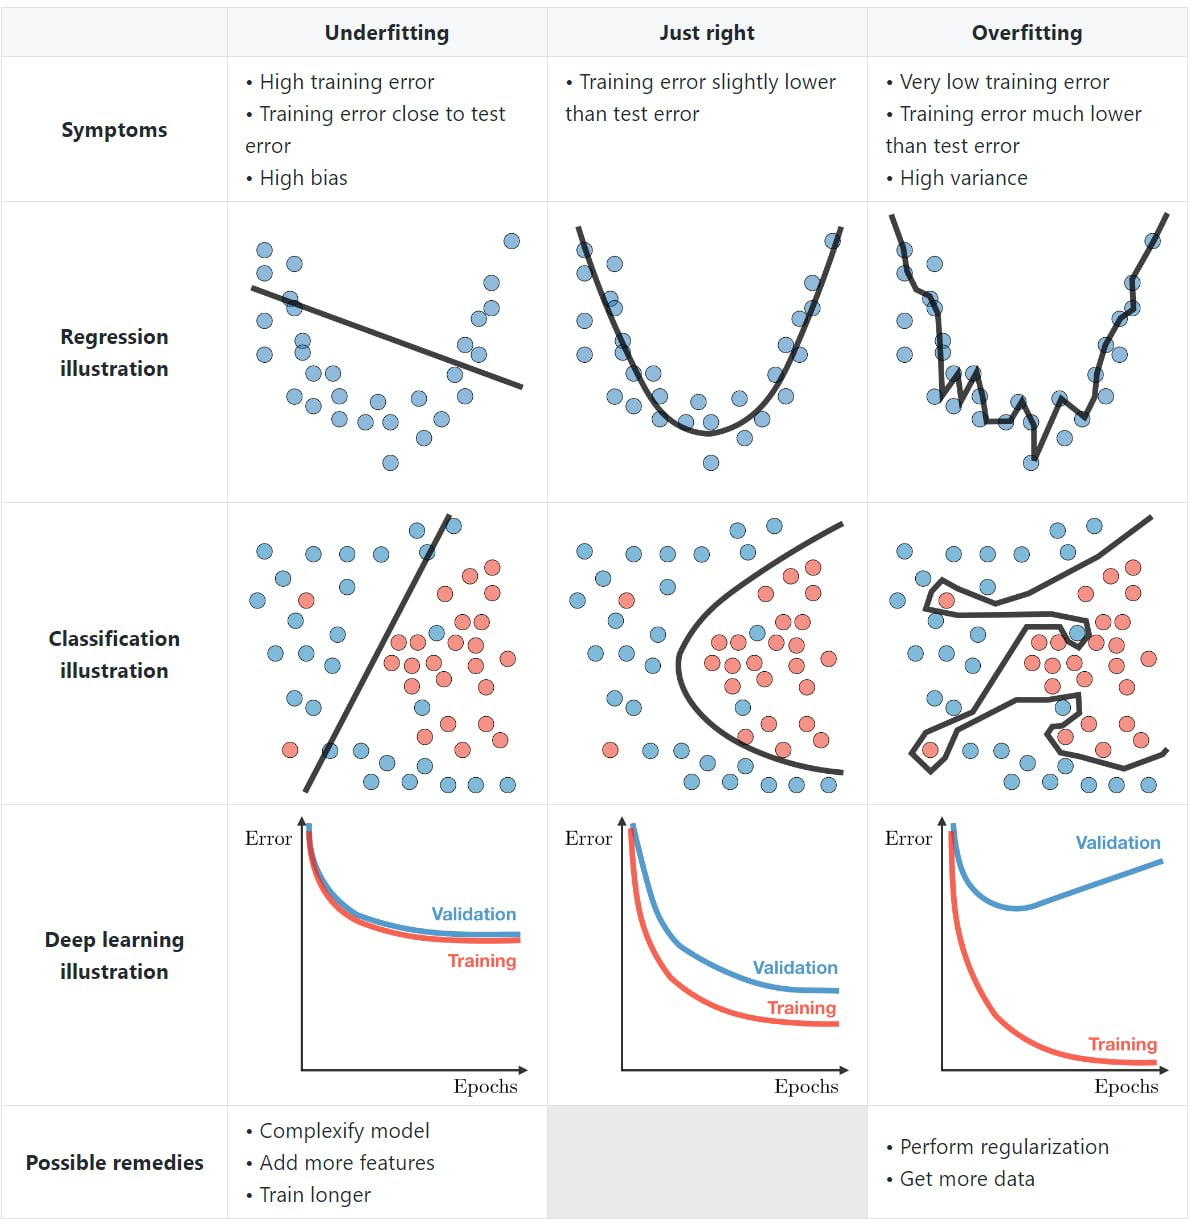

#### Regularizations Method

**tf.keras.regularizers.L1**

**tf.keras.regularizers.L2**

**tf.keras.layers.Dropout()**



```
i.e.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1

# Create a Sequential model
model = Sequential()

# Add a Dense layer with L1 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01), input_shape=(input_dim,)))
# Here, 0.01 is the L1 regularization strength.

# Add more layers as needed
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


```

```
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add a Dense layer
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))

# Add a dropout layer
model.add(Dropout(0.5))
# Here, 0.5 is the dropout rate, which means 50% of the neurons will be dropped out during training.

# Add more layers as needed
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# You can now train the model using your dataset, X_train and y_train
# model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
```



#### Other Regularization:



*   Data Augmentation

*   Early Stopping


#### Momentum

```
tf.keras.optimizers.SGD(
    learning_rate = 0.01,
    momentum = ...,
    ...
    ...
)
```
**Effect on Optimization**: Momentum helps optimization algorithms navigate regions of the loss surface that have local minima or flat areas. It allows the optimization process to "break free" from these local minima and continue searching for a better solution. In essence, it adds inertia to the optimization process, allowing it to push through regions with small gradients and reach a more suitable minimum.

0.9: A momentum value of 0.9 is a common default choice and is often a good starting point. It tends to work well for a wide range of tasks and datasets. Many machine learning frameworks use this value as a default.

0.99: A higher momentum value, such as 0.99, can be used when the optimization process needs more aggressive momentum. This can be beneficial when dealing with noisy or sparse gradients. However, very high momentum values can lead to overshooting and instability in some cases.

0.5 to 0.8: Lower momentum values, in the range of 0.5 to 0.8, may be suitable for certain optimization scenarios, especially when dealing with highly non-convex loss surfaces or when you want to reduce the risk of overshooting local minima.





#### RMSprop and Adam
```
tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    weight_decay=None,
    ...
)
```
RMS + Momentum = Adam



```
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    ...
)
```






#### Tuning Process:

###### Most Important

*   learning parameter α
------------------------------------------------
### Usually Same

*   Momentum β -----------> 0.9 good default
*   beta_1, beta_2 and epsilon  ------------------> 0.9, 0.999, 10^-8
------------------------------------------------
### Important

* \# Layers
* \# Hidden Units
* Learning rate decay
------------------------------------------------

### Important...

* mini_batch size: Use 2^n usually 16 and 32


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
print(train_data.shape)   # Train set include 60000 image with 28*28

print(train_labels) # Sparse

(60000, 28, 28)
[9 0 0 ... 3 0 5]


In [ ]:
""" Labels 0 T-shirt/top 5 Sandal

1 Trouser 6 Shirt

2 Pullover 7 Sneaker

3 Dress 8 Bag

4 Coat 9 Ankle boot """;

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Normalize Dataset

In [ ]:
train_data = train_data / 255.
test_data = test_data / 255.

In [ ]:
model_basic = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_basic.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
model_basic.fit(
    train_data,
    train_labels,
    epochs = 100,
    validation_data = (test_data, test_labels)
)

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8753 - accuracy: 0.3564 - val_loss: 1.5027 - val_accuracy: 0.4830
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3430 - accuracy: 0.5257 - val_loss: 1.2281 - val_accuracy: 0.5696
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1428 - accuracy: 0.5928 - val_loss: 1.0749 - val_accuracy: 0.6151
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0158 - accuracy: 0.6283 - val_loss: 0.9739 - val_accuracy: 0.6394
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9353 - accuracy: 0.6470 - val_loss: 0.9117 - val_accuracy: 0.6528
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8860 - accuracy: 0.6596 - val_loss: 0.8730 - val_accuracy: 0.6522
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8534 - accuracy: 0.6670 - val_loss: 0.8466 - val_ac

In [ ]:
model_better = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = train_data[0].shape),
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")

])

model_better.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["accuracy"])

In [ ]:
history_better = model_better.fit(train_data,
                                  train_labels,
                                  epochs = 100,
                                  validation_data = (test_data, test_labels),)

Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8769 - accuracy: 0.2552 - val_loss: 1.6294 - val_accuracy: 0.3810
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4658 - accuracy: 0.4296 - val_loss: 1.3295 - val_accuracy: 0.5136
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1998 - accuracy: 0.5417 - val_loss: 1.0977 - val_accuracy: 0.5818
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0339 - accuracy: 0.6005 - val_loss: 0.9912 - val_accuracy: 0.6346
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9487 - accuracy: 0.6495 - val_loss: 0.9271 - val_accuracy: 0.6757
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8893 - accuracy: 0.6769 - val_loss: 0.8751 - val_accuracy: 0.6874
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8393 - accuracy: 0.6982 - val_loss: 0.8334 - val_ac

<Axes: >

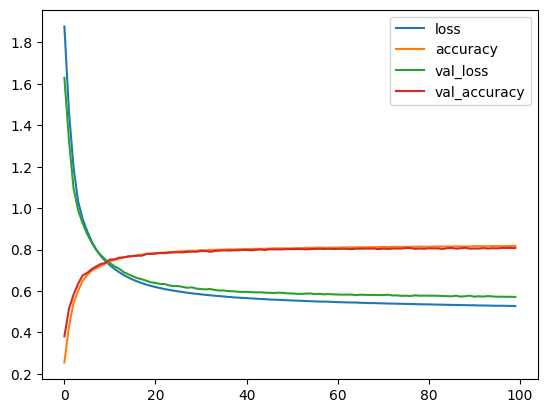

In [ ]:
pd.DataFrame(history_better.history).plot()